# This is the plot script for homework 4 question 4.3, 4.4, 4.5 and 4.6

In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from tensorboardX import SummaryWriter
import os
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from typing import List, Dict, Any
import numpy as np


/Users/eric/miniconda3/envs/cs285/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
LOGS = [
'data/llm_10_envs_100000_feedback_period_dqn_LunarLander-v2_s16_l2_d0.99_doubleq_12-12-2023_21-39-48',
'data/baseline_dqn_LunarLander-v2_s16_l2_d0.99_doubleq_12-12-2023_23-58-01',
'data/eval_dqn_LunarLander-v2_s16_l2_d0.99_doubleq_13-12-2023_08-43-43',
]
EVENT_ACCS = [EventAccumulator(log).Reload() for log in LOGS]

In [ ]:
# LLM: 'eval_return','train_return','train_ep_len','critic_loss','q_values','target_values',\
# Baseline: 'eval_return','train_return','train_ep_len','critic_loss','q_values','target_values',
# Eval: 'eval_return_0','eval_ep_len_0','eval_0/return_std','eval_0/return_max','eval_0/return_min','eval_0/ep_len_std','eval_0/ep_len_max','eval_0/ep_len_min','eval_return_1','eval_ep_len_1','eval_1/return_std','eval_1/return_max','eval_1/return_min','eval_1/ep_len_std','eval_1/ep_len_max','eval_1/ep_len_min'

In [25]:
Compare_Tag = ['eval_return','train_return','train_ep_len','critic_loss','q_values','target_values',]
log_files = LOGS[:2]
acc_list = EVENT_ACCS[:2]

<Figure size 1000x500 with 0 Axes>

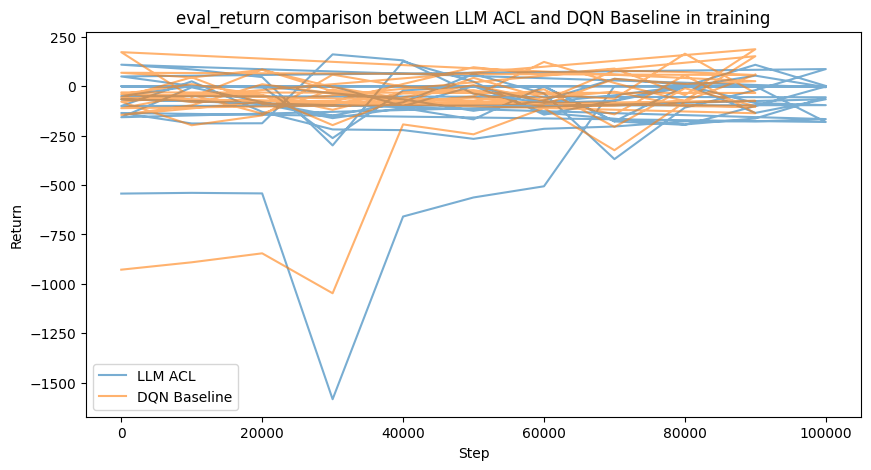

<Figure size 1000x500 with 0 Axes>

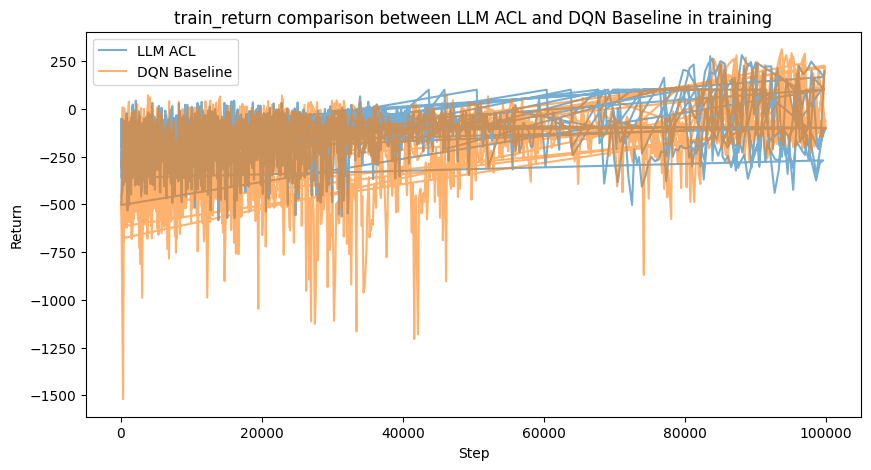

<Figure size 1000x500 with 0 Axes>

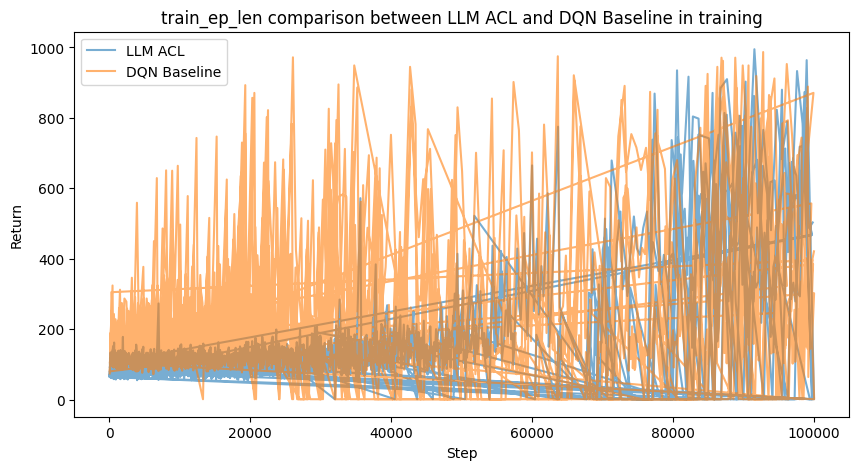

<Figure size 1000x500 with 0 Axes>

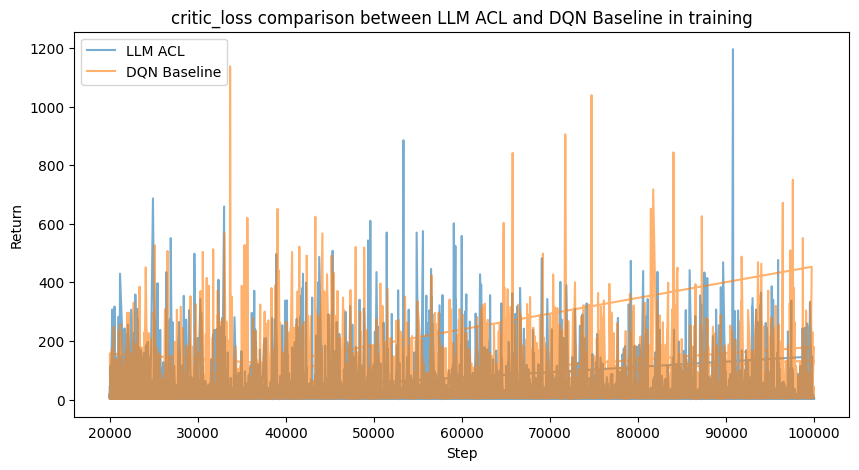

<Figure size 1000x500 with 0 Axes>

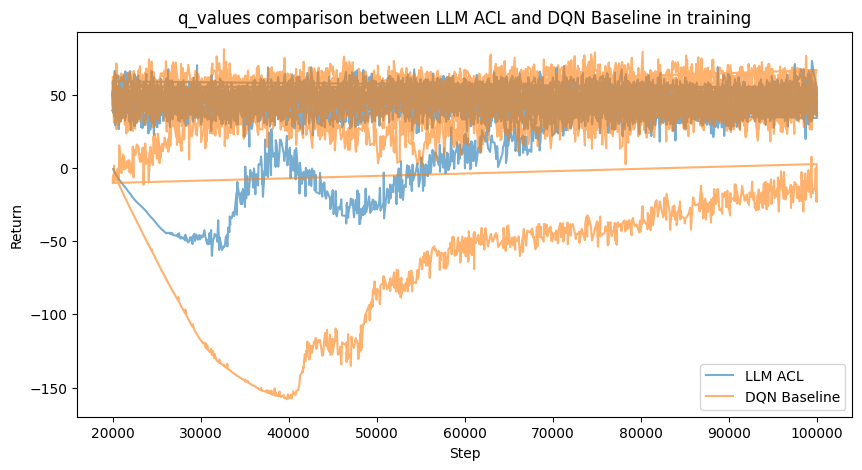

<Figure size 1000x500 with 0 Axes>

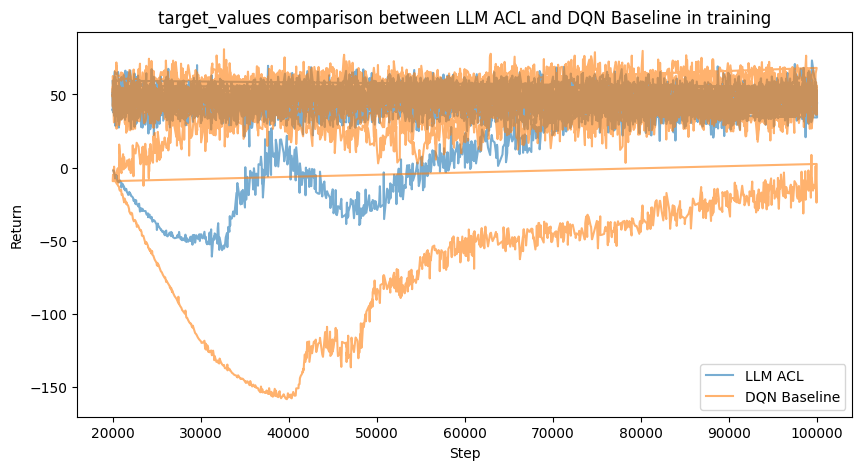

In [26]:
alpha_labels = ['LLM ACL','DQN Baseline']
for key in Compare_Tag:
    plt.figure(figsize=(10, 5))
    fig,ax = plt.subplots(1,1,figsize=(10,5))
    for i,log_file in enumerate(log_files):

        event_acc = acc_list[i]
        scalar_keys = [key]
        if isinstance(scalar_keys, str):    
            scalar_keys = [scalar_keys]

        # Extract the scalar summaries
        scalars = {}
        for tag in scalar_keys:
            scalars_for_tag = event_acc.Scalars(tag)
            scalars[tag] = {
                'step': [s.step for s in scalars_for_tag],
                'wall_time': [s.wall_time for s in scalars_for_tag],
                'value': [s.value for s in scalars_for_tag],
            }
            ax.plot(scalars[tag]['step'],scalars[tag]['value'],label=alpha_labels[i],alpha=0.6)
            
    ax.legend()
    ax.set_xlabel('Step')
    ax.set_ylabel('Return')
    plt.title(f"{key} comparison between LLM ACL and DQN Baseline in training")
    plt.savefig(f'{key}_compare_training.png',dpi=300)
    plt.show()


In [43]:
Compare_Tag = ['eval_return','eval_ep_len','eval/return_std','eval/return_max','eval/return_min','eval/ep_len_std','eval/ep_len_max','eval/ep_len_min','eval_return','eval_ep_len','eval/return_std','eval/return_max','eval/return_min','eval/ep_len_std','eval/ep_len_max','eval/ep_len_min',]


# Compare_Tag = ['eval_return_0','eval_ep_len_0','eval_0/return_std','eval_0/return_max','eval_0/return_min','eval_0/ep_len_std','eval_0/ep_len_max','eval_0/ep_len_min','eval_return_1','eval_ep_len_1','eval_1/return_std','eval_1/return_max','eval_1/return_min','eval_1/ep_len_std','eval_1/ep_len_max','eval_1/ep_len_min',]

log_files = [LOGS[2]]
log_file = LOGS[2]
acc_list = [EVENT_ACCS[2]]
event_acc = EVENT_ACCS[2]

eval_return eval_return_0
eval_return eval_return_1


<Figure size 1000x500 with 0 Axes>

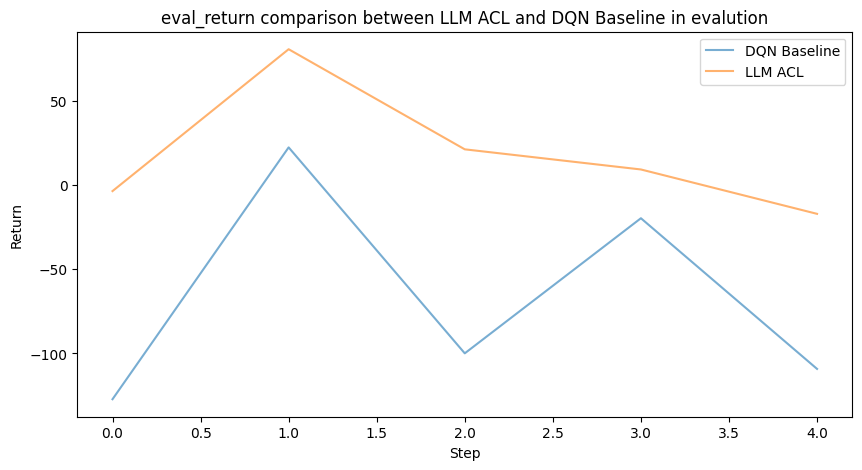

eval_ep_len eval_ep_len_0
eval_ep_len eval_ep_len_1


<Figure size 1000x500 with 0 Axes>

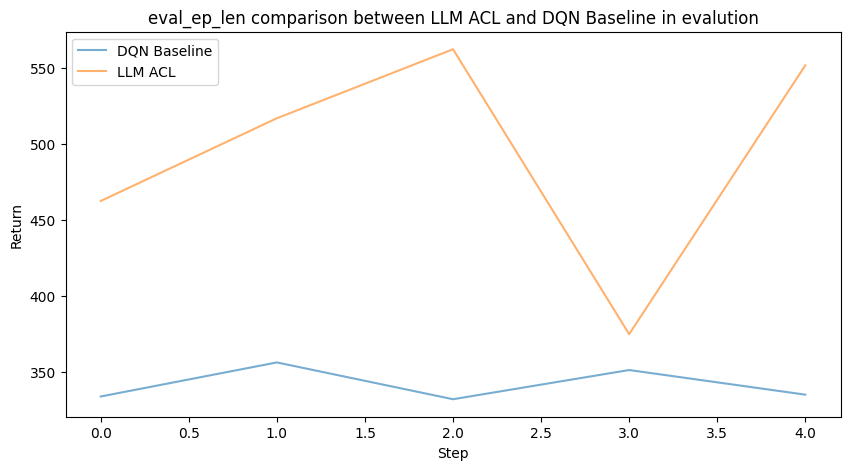

eval/return_std eval_0/return_std
eval/return_std eval_1/return_std


FileNotFoundError: [Errno 2] No such file or directory: 'eval/return_std_compare_training.png'

<Figure size 1000x500 with 0 Axes>

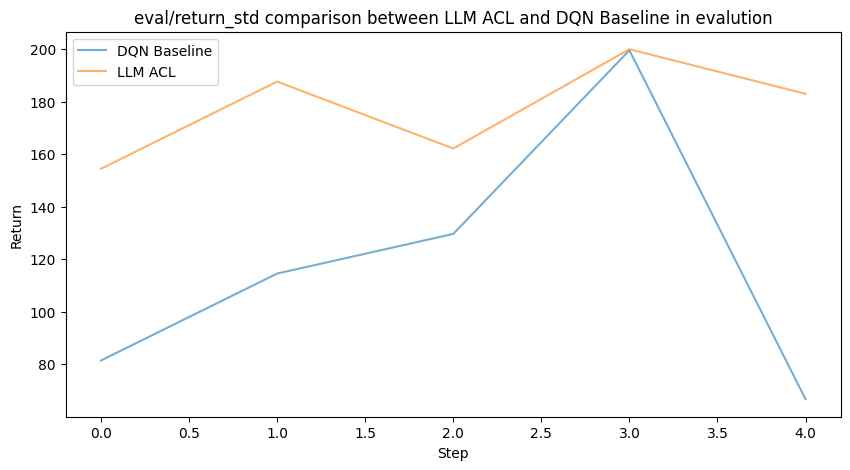

In [45]:
alpha_labels = ['DQN Baseline','LLM ACL']
postfix = ['_0','_1']
for rawkey in Compare_Tag:
    plt.figure(figsize=(10, 5))
    fig,ax = plt.subplots(1,1,figsize=(10,5))
    for i in range(2):
        if '/' in rawkey:
            key = rawkey.split('/')
            key = key[0]+postfix[i]+'/'+key[1]
        else:
            key = rawkey+postfix[i]
        print(rawkey,key)
        scalar_keys = [key]
        if isinstance(scalar_keys, str):    
            scalar_keys = [scalar_keys]

        # Extract the scalar summaries
        scalars = {}
        for tag in scalar_keys:
            scalars_for_tag = event_acc.Scalars(tag)
            scalars[tag] = {
                'step': [s.step for s in scalars_for_tag],
                'wall_time': [s.wall_time for s in scalars_for_tag],
                'value': [s.value for s in scalars_for_tag],
            }
            ax.plot(scalars[tag]['step'],scalars[tag]['value'],label=alpha_labels[i],alpha=0.6)
            
    ax.legend()
    ax.set_xlabel('Step')
    ax.set_ylabel('Return')
    plt.title(f"{rawkey} comparison between LLM ACL and DQN Baseline in evalution")
    plt.savefig(f'{rawkey}_compare_training.png',dpi=300)
    plt.show()
